In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
train = pd.read_csv('train_users_2.csv')
test = pd.read_csv('test_users.csv')

In [5]:
age_gender = pd.read_csv('age_gender_bkts.csv')
sessions = pd.read_csv('sessions.csv')

In [6]:
country = pd.read_csv('countries.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [8]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [9]:
train.shape

(213451, 16)

## Drop 'id', 'date_first_booking' and 'destination' column

## 'date_first_booking' is useless because we want to predict before their first booking

## Contatenate train and test dataset

In [10]:
X_train = train.drop(['date_first_booking', 'country_destination'], axis=1)
X_test = test.drop(['date_first_booking'], axis=1)

In [11]:
train

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [12]:
y_des = train['country_destination'].values

In [13]:
X=pd.concat((X_train, X_test), axis=0, ignore_index=True)

In [14]:
X.shape

(275547, 14)

## Fill missing data with its last value

In [15]:
X.fillna(method='pad').head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


## Delete unmeaningful value in age column

In [16]:
X.loc[X.age > 90, 'age'] = -1
X.loc[X.age < 13, 'age'] = -1

In [17]:
train.loc[X.age > 90, 'age'] = -1
train.loc[X.age < 13, 'age'] = -1

In [18]:
X['age'].describe()

count    158681.000000
mean         35.268066
std          12.392166
min          -1.000000
25%          28.000000
50%          33.000000
75%          41.000000
max          90.000000
Name: age, dtype: float64

In [19]:
X.loc[X.age.isnull(), 'age']=X.age.mean()

## Split 'date_account_created' as dac_year, dac_month, dac_day

In [20]:
dac = np.vstack(
    X.date_account_created.astype(str).apply(
        lambda x: list(map(int, x.split('-')))
    ).values
)
X['dac_year'] = dac[:, 0]
X['dac_month'] = dac[:, 1]
X['dac_day'] = dac[:, 2]
X = X.drop(['date_account_created'], axis=1)

In [21]:
X.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dac_year,dac_month,dac_day
0,gxn3p5htnn,20090319043255,-unknown-,35.268066,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28
1,820tgsjxq7,20090523174809,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25
2,4ft3gnwmtx,20090609231247,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28
3,bjjt8pjhuk,20091031060129,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5
4,87mebub9p4,20091208061105,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14


## Add feature "session_count" to dataset.

In [22]:
df = sessions.user_id.value_counts()
print(df.shape)
print(df.head())

(135483,)
mxqbh3ykxl    2722
0hjoc5q8nf    2644
mjbl6rrj52    2476
l5lgm3w5pc    2424
wg9413iaux    2362
Name: user_id, dtype: int64


In [23]:
df = df.to_frame()

In [24]:
df = df.rename(columns = {'user_id' : 'session_count'})
df['id'] = df.index
df.head()

,session_count,id
mxqbh3ykxl,2722,mxqbh3ykxl
0hjoc5q8nf,2644,0hjoc5q8nf
mjbl6rrj52,2476,mjbl6rrj52
l5lgm3w5pc,2424,l5lgm3w5pc
wg9413iaux,2362,wg9413iaux


In [25]:
X = pd.merge(X, df, how = 'left', on = ['id'])

In [26]:
X.session_count.fillna(-1, inplace = True)

In [27]:
X.session_count = X.session_count.astype(int)

## Split 'timestamp_first_active' as tfa_year, tfa_month, tfa_day

In [28]:
tfa = np.vstack(
    X.timestamp_first_active.astype(str).apply(
        lambda x: list(map(int, [x[:4], x[4:6], x[6:8],
                                 x[8:10], x[10:12],
                                 x[12:14]]))
    ).values
)
X['tfa_year'] = tfa[:, 0]
X['tfa_month'] = tfa[:, 1]
X['tfa_day'] = tfa[:, 2]
X = X.drop(['timestamp_first_active'], axis=1)

## some visualizations

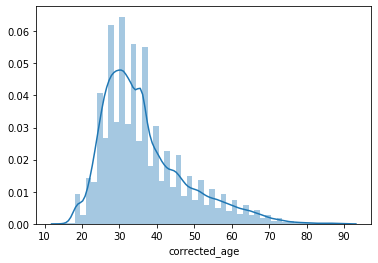

In [29]:
# age distributions
train['corrected_age']=train['age'].apply(lambda x : 36 if x>90 or x<10 else x)
sns.distplot(train.corrected_age.dropna())

Text(0, 0.5, 'Percentage of signup_app')

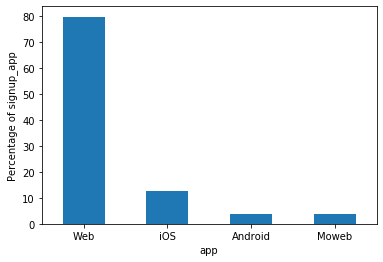

In [30]:
# percentage of user using different signup app
signup_app = X.signup_app.value_counts(dropna = False) / len(X) * 100
signup_app.plot('bar', rot = 0)
plt.xlabel('app')
plt.ylabel('Percentage of signup_app')

Text(0, 0.5, 'Percentage of signup_method')

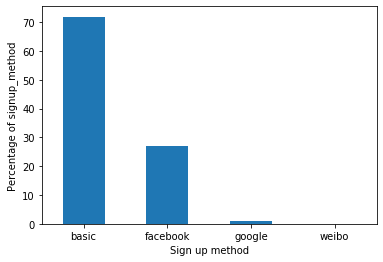

In [31]:
# percentage of users using different signup_method
signup_method = X.signup_method.value_counts(dropna = False) / len(X) * 100
signup_method.plot('bar', rot = 0)
plt.xlabel('Sign up method')
plt.ylabel('Percentage of signup_method')

Text(0, 0.5, 'Percentage of gender')

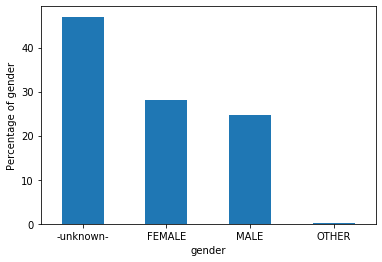

In [32]:
# percentage of gender
gender = X.gender.value_counts(dropna = False) / len(X) * 100
gender.plot('bar', rot = 0)
plt.xlabel('gender')
plt.ylabel('Percentage of gender')

Text(0, 0.5, 'Percentage of booking')

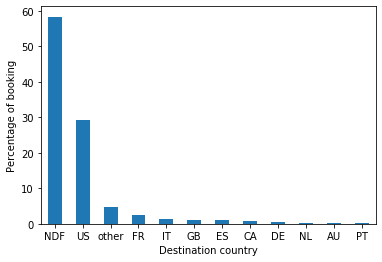

In [33]:
# percentage of people going to different countries
des_countries = train.country_destination.value_counts(dropna = False) / len(train) * 100
des_countries.plot('bar', rot = 0)
plt.xlabel('Destination country')
plt.ylabel('Percentage of booking')

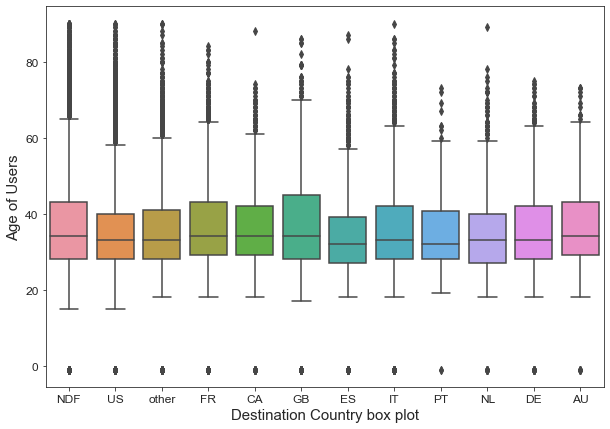

In [34]:
# Relavance between Age and destination
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.boxplot(y='age' , x='country_destination',data=train)
plt.xlabel('Destination Country box plot',size=15)
plt.ylabel('Age of Users', size=15)
plt.tick_params(labelsize=12)

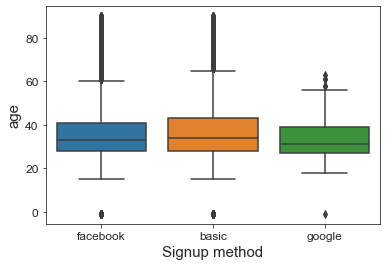

In [35]:
# relevance between age and signup method
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
sns.boxplot(y='age' , x='signup_method',data=train)
plt.xlabel('Signup method', size=15)
plt.ylabel('age', size=15)
plt.tick_params(labelsize=12)
#sns.despine()

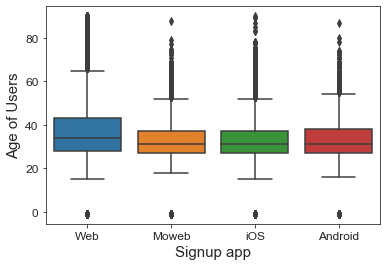

In [36]:
# relevence between age and signup app
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
sns.boxplot(y='age' , x='signup_app',data=train)
plt.xlabel('Signup app',size=15)
plt.ylabel('Age of Users', size=15)
plt.tick_params(labelsize=12)
#sns.despine()

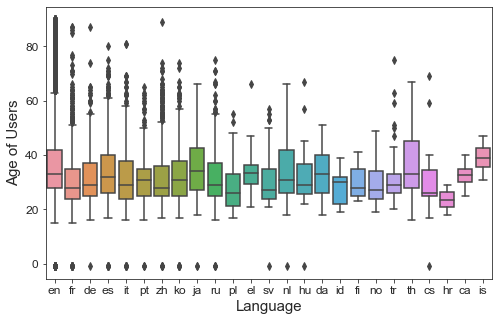

In [37]:
#relevence between age and language
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.boxplot(y='age' , x='language',data=train)
plt.xlabel('Language', size=15)
plt.ylabel('Age of Users', size=15)
plt.tick_params(labelsize=12)
#sns.despine()

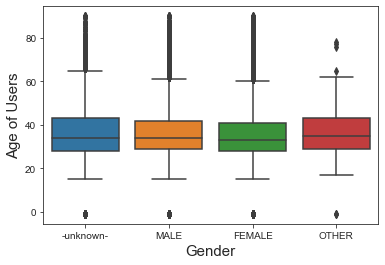

In [38]:
# relevance between age and gender
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
sns.boxplot(y='age' , x='gender',data=train)
plt.xlabel('Gender', size=15)
plt.ylabel('Age of Users', size=15)
plt.tick_params(labelsize=10)
#sns.despine()

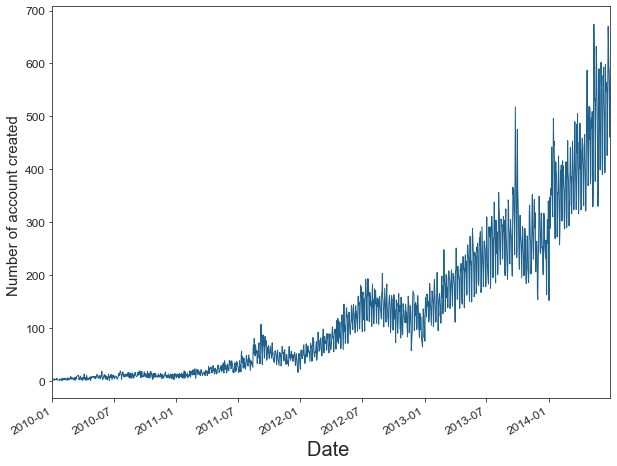

In [39]:
# chart for number of account created
train['date_account_created_new'] = pd.to_datetime(train['date_account_created'])
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
train.date_account_created_new.value_counts().plot(kind='line', linewidth=1, color='#1F618D')
plt.xlabel('Date ', size=20)
plt.ylabel('Number of account created ', size=15)
plt.tick_params(labelsize=12)
#sns.despine()

## One hot coding--by get.dummies

In [40]:
oh_features = ['gender', 'signup_method', 'signup_flow', 'language',
                'affiliate_channel', 'affiliate_provider',
                'first_affiliate_tracked', 'signup_app',
                'first_device_type', 'first_browser']

In [41]:
for feature in oh_features:
    X_dummy = pd.get_dummies(X[feature], prefix=feature)
    X = X.drop([feature], axis=1)
    X = pd.concat((X, X_dummy), axis=1)

In [42]:
X.head()

,id,age,dac_year,dac_month,dac_day,session_count,tfa_year,tfa_month,tfa_day,gender_-unknown-,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,gxn3p5htnn,35.268066,2010,6,28,-1,2009,3,19,1,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,38.000000,2011,5,25,-1,2009,5,23,0,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,56.000000,2010,9,28,-1,2009,6,9,0,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,42.000000,2011,12,5,-1,2009,10,31,0,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,41.000000,2010,9,14,-1,2009,12,8,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#split the well processed dataset into X_train and X_test
X_train = X.iloc[:len(train), :]
X_test = X.iloc[len(train):, :]
X_train = X_train.drop(['id'], axis=1)
X_train.shape
X_test = X_test.drop(['id'], axis=1)

## Label Encode target y colunm

In [44]:
le = LabelEncoder()
y_trans = le.fit_transform(y_des)

In [45]:
y_trans.shape

(213451,)

## train test split

In [46]:
dtrain, dtest, train_label, test_label = train_test_split(X_train, y_trans, test_size = 0.3, random_state = 817)

## logistic regression

In [48]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(dtrain, train_label)
pred_log=logreg.predict(dtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(test_label, pred_log))

/Users/fuxia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fuxia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6031763383097007


## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=20, n_estimators=100)
rfc.fit(dtrain , train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
pred = rfc.predict(dtest)
print(accuracy_score(test_label, pred))

0.6243987756886751


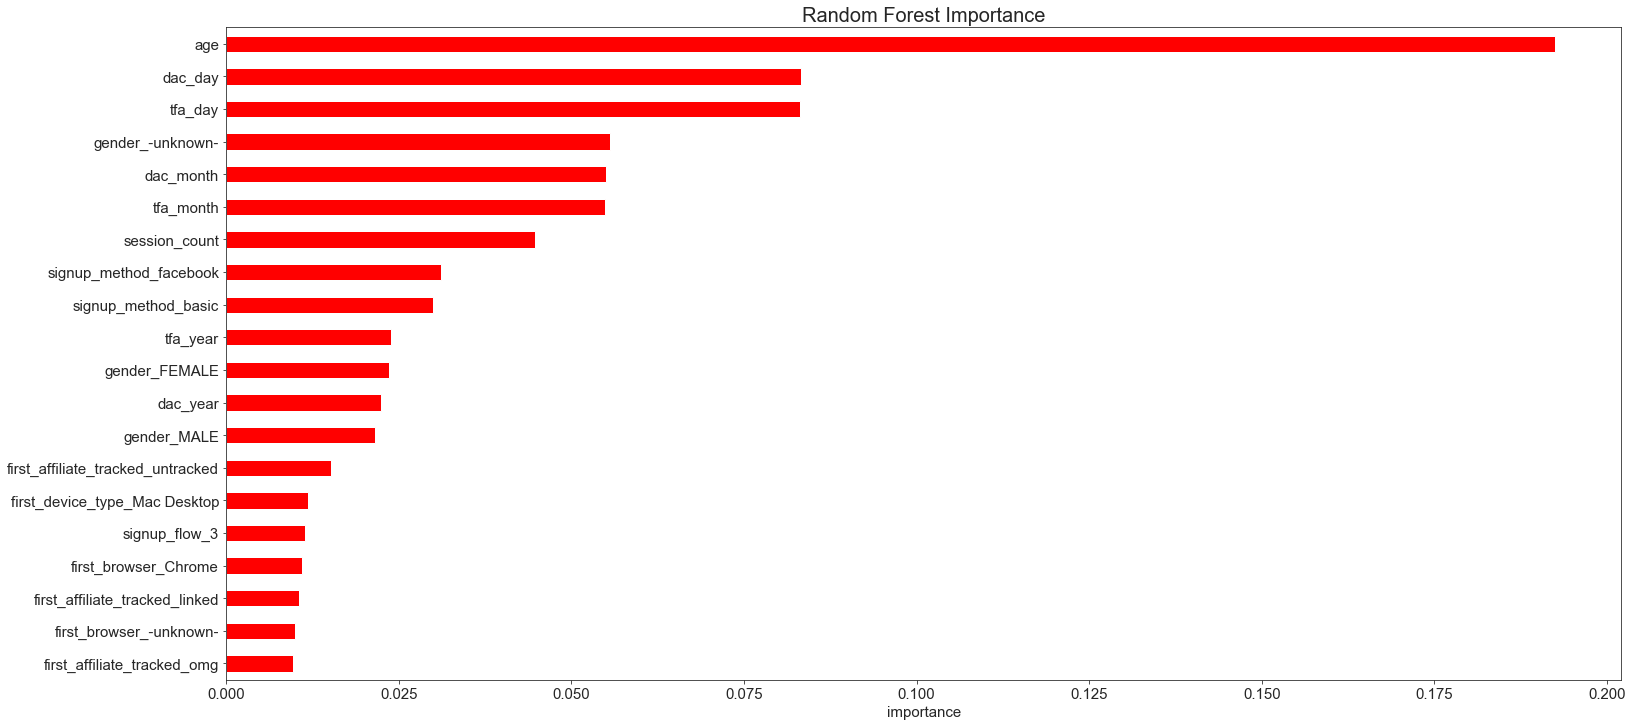

In [86]:
fi=pd.Series(rfc.feature_importances_, index=dtrain.columns)
fn=fi.sort_values(ascending=True)
fn[-20:].plot(kind='barh', color='r', figsize=(25, 12))
plt.xlabel('importance', size=15)
plt.title('Random Forest Importance', size=20)
plt.tick_params(labelsize=15)

## Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(dtrain , train_label)
pred = dtc.predict(dtest)
print(accuracy_score(test_label, pred))

0.6307233431194953


## XGBClassifier

In [88]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(max_depth=4, learning_rate=0.03, n_estimators=100,
                    objective='multi:softprob', subsample=0.6, colsample_bytree=0.6, seed=40)
xgb.fit(dtrain , train_label)
pred = xgb.predict(dtest) 
print(accuracy_score(test_label, pred))

0.6345805484415017


## Predict using XGBClassifier

In [ ]:
# only XGBoost
xgb = XGBClassifier(max_depth=4, learning_rate=0.03, n_estimators=100,
                    objective='multi:softprob', subsample=0.6, colsample_bytree=0.6, seed=40)
xgb.fit(X_train, y_trans)
XGBC_pred_test = xgb.predict(X_test)

In [ ]:
XGBC_pred_test_prob=xgb.predict_proba(X_test)

In [ ]:
ids_test = test['id']

ids = []
countries = []

for i in range(len(X_test)):
    idx = ids_test[i]
    ids += [idx] * 5
    countries += le.inverse_transform(np.argsort(XGBC_pred_test_prob[i])[::-1][:5]).tolist()

In [ ]:
submission = pd.DataFrame({
    "id" : ids,
    "country" : countries
})
submission.to_csv('submission_XGBC.csv', index = False)

In [ ]:
submission.head(10)
#0.86525 evaluated by kaggle

## Predict by using XGBoost with cross Validate

In [ ]:
n_labels=len(set(y_des))
n_labels

In [ ]:
params = {
    'objective': 'multi:softprob',
    'eval_metric': 'merror',
    'num_class': n_labels,
    'eta': 0.5,
    'max_depth': 6,
    'subsample': 0.5,
    'colsample_bytree': 0.3,
    'silent': 1,
    'seed': 123
}

In [ ]:
import xgboost as xgb
num_boost_round = 50

Dtrain = xgb.DMatrix(X_train, y_trans)
res = xgb.cv(params, Dtrain, num_boost_round=num_boost_round, nfold=5,
             callbacks=[xgb.callback.print_evaluation(show_stdv=True),
                        xgb.callback.early_stop(50)])

In [ ]:
num_boost_round = res['test-merror-mean'].idxmin()
print(format(num_boost_round))
clf = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round)
clf

In [ ]:
import operator
importance = clf.get_fscore()
importance_df = pd.DataFrame(
    sorted(importance.items(), key=operator.itemgetter(1)),
    columns=['feature', 'fscore']
)

In [ ]:
importance_df = importance_df.iloc[-20:, :]

In [ ]:
plt.figure()
importance_df.plot(kind='barh', x='feature', y='fscore',
                   legend=False, figsize=(20, 10))
plt.title('XGBoost Feature Importance', size=25)
plt.xlabel('Relative importance', size=20)
plt.ylabel('Features', size=20)
plt.tick_params(labelsize=15)
#plt.gcf().savefig('feature_importance.png')

In [ ]:
test_n=X_test.shape[0]
test_n

In [ ]:
Dtest = xgb.DMatrix(X_test)

In [ ]:
y_pred = clf.predict(Dtest).reshape(test_n, n_labels)

In [ ]:
ids_test = test['id']
ids = []
countries = []
for i in range(len(test)):
    idx = ids_test[i]
    ids += [idx] * 5
    countries += le.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()

submission = pd.DataFrame(np.column_stack((ids, countries)),
                          columns=['id', 'country'])
submission.to_csv('submission_CV.csv', index=False)


In [ ]:
submission.head(10)
#score=0.86491 evaluated by kaggle